<a href="https://colab.research.google.com/github/harikrishnan1782/testing/blob/main/Dpatter_Task_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Hari
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Price Optimization.csv')
print(df.shape)
df.describe()


(676, 30)


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [17]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
df = df.sort_values(['product_id', 'month_year'])
df.describe()
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [18]:
""" Feature Engineering
Hari
"""
# Price change and demand change formula
df['price_change'] = df.groupby('product_id')['unit_price'].pct_change()
df['demand_change'] = df.groupby('product_id')['qty'].pct_change()
# Elasticity score per row
df['elasticity_score'] = df['demand_change'] / df['price_change']
# Profit

df['estimated_cost'] = df['unit_price'] * 0.60
df['profit'] = (df['unit_price'] - df['estimated_cost']) * df['qty']

# Competitor average price
df['avg_competitor_price'] = (df['comp_1'] + df['comp_2'] + df['comp_3']) / 3

# How your price compares to competitors
df['price_vs_competitor'] = df['unit_price'] / df['avg_competitor_price']

# Rolling demand averages
df['rolling_demand_7d'] = df.groupby('product_id')['qty'].transform(
    lambda x: x.rolling(window=2, min_periods=1).mean())  # 2 months as proxy for short term

df['rolling_demand_30d'] = df.groupby('product_id')['qty'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean())  # 4 months as proxy for long term

# Demand deviation for shock detection
df['demand_deviation'] = df['qty'] - df['rolling_demand_30d']

# Inventory level category (using qty as proxy)
df['inventory_level'] = pd.cut(df['qty'], bins=3, labels=['low', 'medium', 'high'])

# Is the product priced higher or lower than competitors
df['is_cheaper_than_market'] = (df['unit_price'] < df['avg_competitor_price']).astype(int)

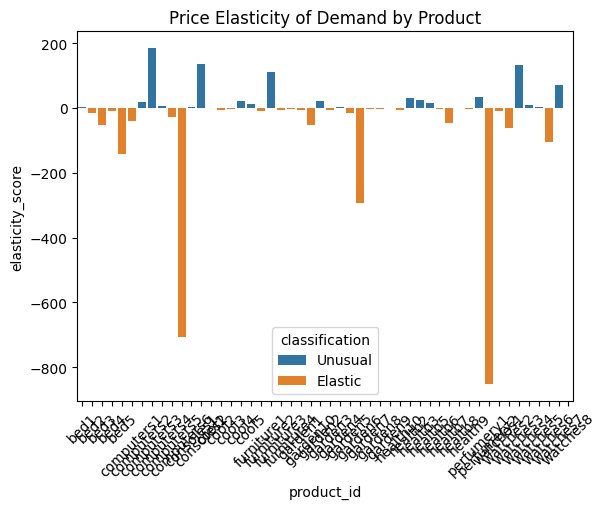

In [19]:
# Demand Elasticity Analysis
# Hari
import matplotlib.pyplot as plt
import seaborn as sns

# Drop infinite and null elasticity values
elasticity_df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['elasticity_score'])

# Average elasticity per product
product_elasticity = elasticity_df.groupby('product_id')['elasticity_score'].mean()

# Classify products
def classify(e):
    if e < -1:
        return 'Elastic'
    elif -1 <= e <= 0:
        return 'Inelastic'
    else:
        return 'Unusual'

product_elasticity_df = product_elasticity.rbeset_index()
product_elasticity_df['classification'] = product_elasticity_df['elasticity_score'].apply(classify)

# Plot
sns.barplot(data=product_elasticity_df, x='product_id', y='elasticity_score', hue='classification')
plt.title('Price Elasticity of Demand by Product')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Train the XGBoost Demand Model
# Hari
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

features = ['unit_price', 'avg_competitor_price', 'price_vs_competitor',
            'freight_price', 'product_score', 'customers', 'month',
            'weekend', 'holiday', 's', 'lag_price', 'rolling_demand_30d']

X = df[features].dropna()
y = df.loc[X.index, 'qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))

MAE: 5.128074645996094


**MAE**: 5.128074645996094